In [94]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Dropout
from tensorflow.keras.optimizers import SGD
tf.__version__

'2.0.0'

In [191]:
def create_images(cnt):
    images = []
    for _ in range(cnt):
        image = np.zeros((50,50))
        line_count = 10
        line_length = 10
        x = 0
        y = 1
        for line_type in np.random.randint(2, size=line_count):
            line = np.zeros((line_length,2))
            line[0] = np.random.randint(50, size=2)
            index = 1
            bordered = False
            if line_type == x:
                while index < line_length:
                    point = np.copy(line[index - 1])
                    if point[x] + 1 < 50 and not bordered:
                        point[x] += 1
                        line[index] = point
                    elif point[x] + 1 >= 50 or bordered:
                        bordered = True
                        if line[0][x] < point[x]:
                            point = np.copy(line[0])
                        point[x] -= 1     
                        line[index] = point
                    index += 1
            elif line_type == y:
                while index < line_length:
                    point = np.copy(line[index - 1])
                    if point[y] + 1 < 50 and not bordered:
                        point[y] += 1
                        line[index] = point
                    elif point[y] + 1 >= 50 or bordered:
                        bordered = True
                        if line[0][y] < point[y]:
                            point = np.copy(line[0])
                        point[y] -= 1     
                        line[index] = point
                    index += 1
            #print(line)
            for point in line:
                p = point.astype(int)
                image[p[0]][p[1]] = 1
        images.append(image.astype(int))
    return images

In [192]:
img = create_images(1)
#img

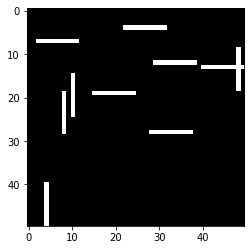

In [193]:
imgplot = plt.imshow(img[0], 'gray')
plt.show()